In [4]:
from numpy import*
a = [[2,3,7],[-2,5,6],[8,9,4]]
b = [3,5,8]
n = len(b)
c = zeros([n,n+1])
for i in range(n):
    for j in range(n):
        c[i][j] = a[i][j]
    c[i][n] = b[i]
for e in range(n):
    t = c[e][e]
    for j in range(e,n+1):
        c[e][j] = c[e][j]/t
    for i in range(e+1,n):
        t = c[i][e]
        for j in range(e,n+1):
            c[i][j] = c[i][j] - t*c[e][j]
x = zeros([n,1])
x[n-1] = c[n-1][n]
for i in range(n-2,-1,-1):
    s = 0
    for j in range(i+1,n):
        s = s+c[i][j] * x[j]
    x[i] = c[i][n] - s
#return x

In [5]:
x

array([[-0.05555556],
       [ 0.91503268],
       [ 0.05228758]])

In [23]:
c = 0
Orden = []
n = [10,50,100,150,200,250,300]
F=len(n)
for i in range(F):
    i
    for e in range(n[i]):
        e
        for l in range(e+1,n[i]):
            for j in range(e,n[i]+1):
                c = c + 1
    Orden.append(c)

In [24]:
Orden

[375, 43250, 381500, 1517625, 4204125, 9443500, 18488250]

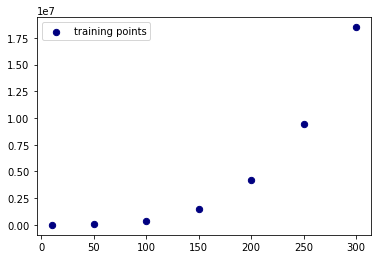

In [31]:
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x= np.array(n)
y= np.array(Orden)
########################################
plt.scatter(x, y, color='navy', s=40, marker='o', label='training points')
plt.legend(loc='upper left')
plt.show()

In [32]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 3  ###############
pf = PolynomialFeatures(degree = 3) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2, C x^3], b ==> b + Ax +Bx^2+CC x^3
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 0.00000000e+00  1.33649773e+04 -1.98669370e+02  1.20313529e+00], b = -170734.05850502662


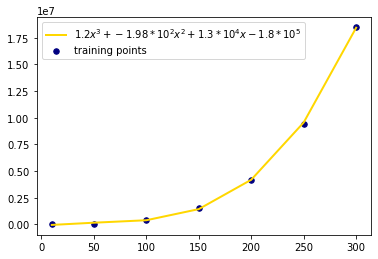

In [33]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o', label='training points')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='gold', linewidth=2,
         label='$1.2x^3+-1.98*10^{2}x^2+1.3*10^{4}x-1.8*10^{5}$')
######################### Agregamos y mostramos leyendas ##########################
plt.legend(loc='upper left')
plt.show()